In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from ipywidgets import Layout

from random import randrange

In [2]:
from load_data import load_file
from helper_functions import calc_scaling,symmetrize,rotate_to_reference,single_rotD,single_rotP,unit_rot
from calc_average import full_average,full_average_IR,full_average_R,full_average_R_orth,numerical_sector_average
from calc_single import oriented_IR,oriented_R,single_rot_IR,single_rot_R,single_polar_IR,single_polar_R
from plotting_functions import polar_plot

In [3]:
#filename="freq-19813-90-2.out"   # less accurate
filename="freq-19813-90-2.fchk"   # more accurate
fr,Z,Q,D,P0,nat,aniso=load_file(filename)

Loaded  freq-19813-90-2.fchk


In [4]:
# parameters
dtheta=0.02
axes=[["x",1], ["y",2] ,["z",3]]

phys_params=dict(laser =785, #633, 
                 T = 298.15
                 )

Lm=1
# calculate intensity scaling factors
v0= math.pow(10, 7)/phys_params['laser']

scalingIR,scaling,scalingexp= calc_scaling(phys_params['T'])
pi=math.pi
torad=2*pi/360

In [5]:
# calculate values for single mode
m=randrange(len(fr))
print("Mode ",m)
P=symmetrize(P0[m,:,:])

# Calculate frequency-dependent scaling factors
# Usual Stokes for thermal population
scalingR=Lm*scaling* math.pow(v0 - fr[m], 4) / (
        fr[m] * (1 - math.exp(scalingexp * fr[m]))) 
# Usual anti-Stokes for thermal population
scalingaR=Lm*scaling* math.pow(v0 + fr[m], 4) / fr[m] *(
        1/(-1+math.exp(-scalingexp * fr[m]))) # 
# For THOR: anti-Stokes without population
scalingTHOR=Lm*scaling* math.pow(v0 + fr[m], 4) / fr[m] 

Mode  25


In [6]:
studies=[["IR absorption",1], ["Raman scattering",2] ,["Conversion",3]]
rb_type_study=widgets.RadioButtons(
    options=studies,
    value=1,
    description='Type of study:',
    style={'description_width': 'initial'},
#    layout={'width': 'max-content'}, # If the items' names are long
    disabled=False
)
display(rb_type_study)

RadioButtons(description='Type of study:', options=(['IR absorption', 1], ['Raman scattering', 2], ['Conversio…

In [7]:
rb_ir_beam=widgets.RadioButtons(
    options=axes,
    value=3,
    description='IR beam:',
    style={'description_width': 'initial'},
    layout={'width': '30%'}, # If the items' names are long
    disabled=False
)

In [8]:
rb_rin_beam=widgets.RadioButtons(
    options=axes,
    value=3,
    description='Raman (in):',
    style={'description_width': 'initial'},
    layout={'width': '30%'}, # If the items' names are long
    disabled=False
)

In [9]:
rb_rout_beam=widgets.RadioButtons(
    options=axes,
    value=3,
    description='Raman (out):',
    style={'description_width': 'initial'},
    layout={'width': '30%'}, # If the items' names are long
    disabled=False
)

In [10]:
#not used (would need generalization of rotation + single orientation fcts)
beams_settings=widgets.HBox([rb_ir_beam, rb_rin_beam, rb_rout_beam])
display(beams_settings)

In [11]:
planes=[["x-y plane",1], ["x-z plane",2] ,["y-z plane",3]]
rb_polar_plan=widgets.RadioButtons(
    options=planes,
    value=2,
    description='Projection plane:',
    style={'description_width': 'initial'},
#    layout={'width': 'max-content'}, # If the items' names are long
    disabled=False
)
display(rb_polar_plan)

RadioButtons(description='Projection plane:', index=1, options=(['x-y plane', 1], ['x-z plane', 2], ['y-z plan…

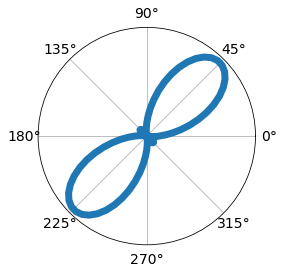

In [13]:
# create polar plot
theta = np.arange(0, 2, dtheta)*pi
nb_theta=len(theta)
I=np.zeros(nb_theta)
proj=rb_polar_plan.value
e=np.array([0.,0.,1.0])


for t in range (0,nb_theta) :
    r=unit_rot(proj,theta[t])
    if rb_type_study.value==1 :
        I[t]=scalingIR*single_polar_IR(D[m,:],r,e)
    elif rb_type_study.value==2 :
        I[t]=scalingR*single_polar_R(P,r,e)
    elif rb_type_study.value==3 :
        I[t]=scalingIR*scalingTHOR*single_polar_IR(D[m,:],r,e)*single_polar_R(P,r,e)

polar_plot(theta,I)